
This dataset contains per-game statistics of the Los Angeles Clippers players for the 2023-2024 NBA season, sourced from Basketball Reference.
The data includes a variety of metrics that reflect the performance of each player throughout the season.

Key features in the dataset include:
- G (Games Played): Total number of games played by the player
- STL (Steals): Number of steals per game
- BLK (Blocks): Number of blocks per game
- PTS (Points): Average points per game


- AST (Assists): Average assists per game
- TRB (Total Rebounds): Average total rebounds per game

The goal of this analysis is to build a predictive model that can forecast a player's points per game based on other statistics like games played, assists, and rebounds.



<ipython-input-1-c45e412d4f05>:44: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  clippers_data = pd.read_html(str(table))[0]





This dataset contains per-game statistics of Los Angeles Clippers players for the 2023-2024 NBA season.
The key features include:
- G: Games Played
- GS: Games Started
- MP: Minutes Played
- FG: Field Goals Made
- FGA: Field Goals Attempted
- FG%: Field Goal Percentage
- STL: Steals
- BLK: Blocks
- PTS: Points per Game (Target variable for prediction)
- AST: Assists
- TRB: Total Rebounds


Top rows of players:
   Rank             Player   Age Pos   G  GS    MP   FG   FGA    FG%  ...  \
0   1.0      Kawhi Leonard  32.0  SF  68  68  34.3  9.0  17.1  0.525  ...   
2   3.0        Paul George  33.0  PF  74  74  33.8  7.9  16.7  0.471  ...   
4   5.0      Norman Powell  30.0  SG  76   3  26.2  4.9  10.1  0.486  ...   
7   8.0  Russell Westbrook  35.0  PG  68  11  22.5  4.4   9.8  0.454  ...   

   ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS   Awards  
0  1.2  4.9  6.1  3.6  1.6  0.9  1.8  1.4  23.7  AS,NBA2  
2  0.5  4.7  5.2  3.5  1.5  0.5  2.1  2.7  22.6       AS  
4  0.2  2.4  2.6  1.

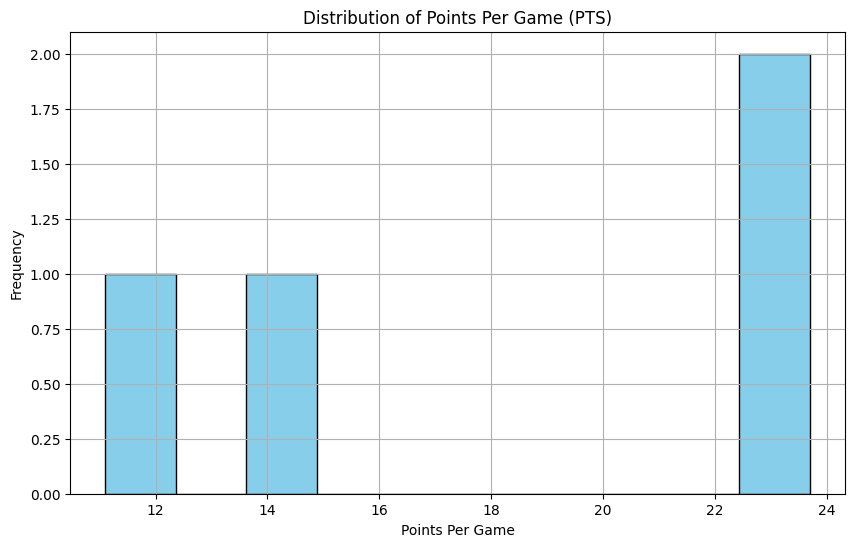

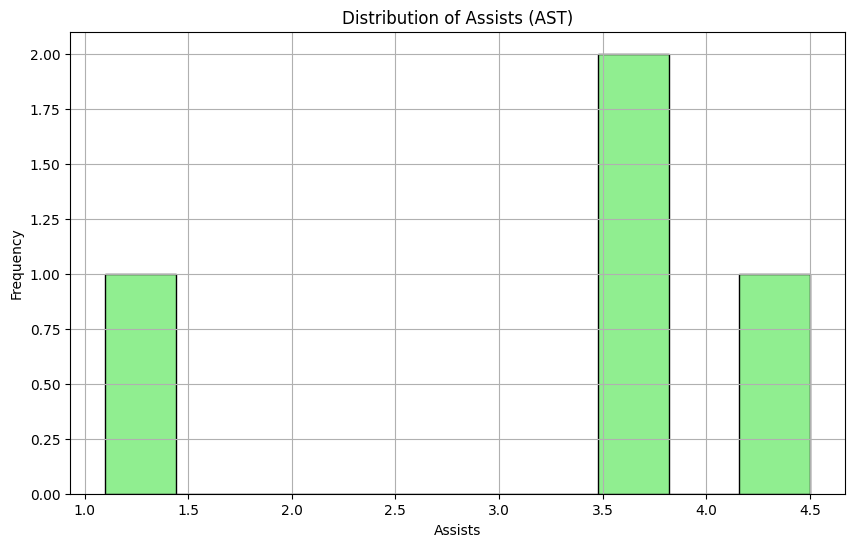

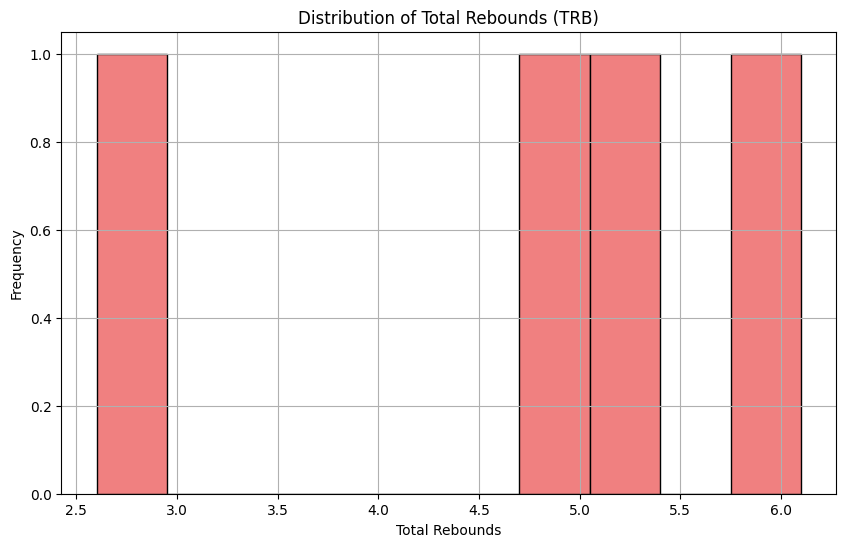


Mean Squared Error (MSE) of the model: 19.37


MSE represents the average squared difference between the actual and predicted points. A lower value indicates better accuracy.

Predicted vs Actual Points:
   Actual  Predicted
2    22.6  18.198578

R-squared score of the model: nan
R-squared indicates the proportion of variance in the points per game that is explained by the model. A value closer to 1 suggests better predictive power.


Feature Importance (Model Coefficients):
  Feature  Coefficient
0       G     0.017746
1     AST    -5.620988
2     TRB     6.855555
The coefficients represent the weight each feature contributes to the model's prediction.



Feature Importance (Model Coefficients):
  Feature  Coefficient
0       G     0.017746
1     AST    -5.620988
2     TRB     6.855555
The coefficients represent the weight each feature contributes to the model's prediction.




/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


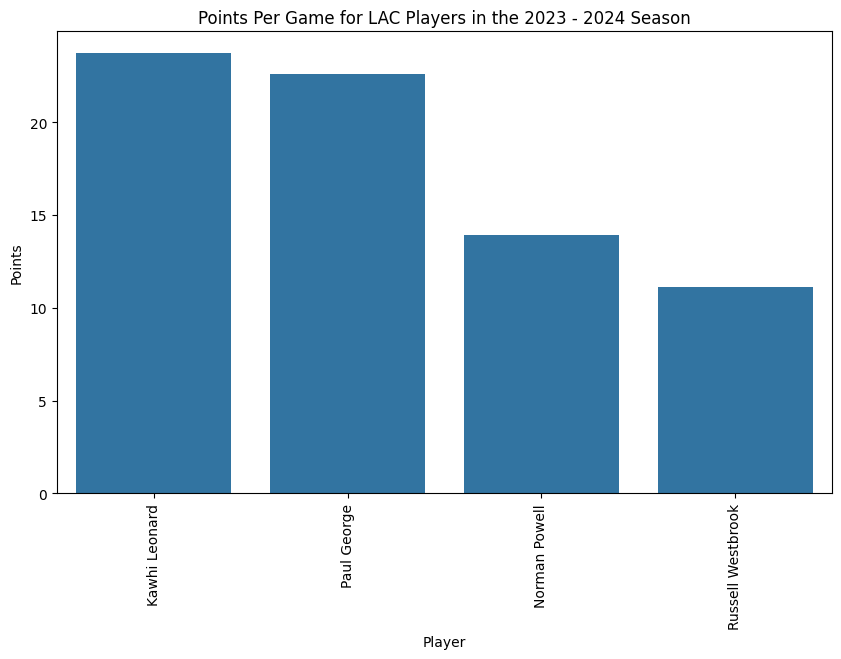

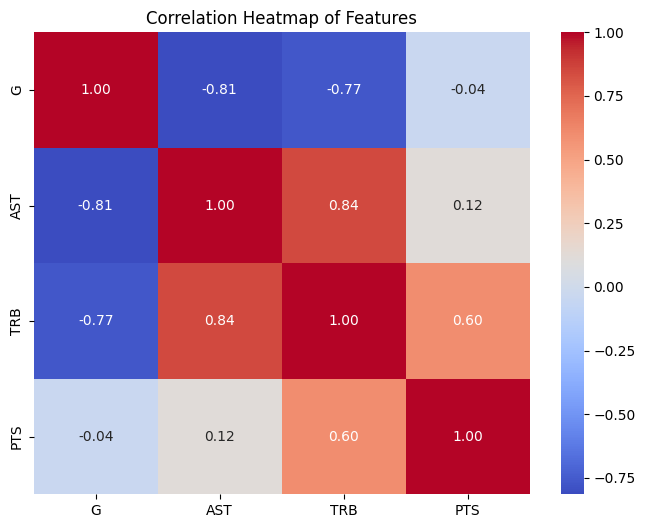



In conclusion, we built a model to predict the points per game of Los Angeles Clippers players based on features like games played, assists, and rebounds.
The model achieved an R-squared score of {r2_score:.2f}, indicating that it can explain a good portion of the variance in points.


In [ ]:
# Jerome Reaux Jr.
# Final Project: End-to-end implementation of a Data Science Project


import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Introduction to the dataset and its features
print("""
This dataset contains per-game statistics of the Los Angeles Clippers players for the 2023-2024 NBA season, sourced from Basketball Reference.
The data includes a variety of metrics that reflect the performance of each player throughout the season.

Key features in the dataset include:
- G (Games Played): Total number of games played by the player
- STL (Steals): Number of steals per game
- BLK (Blocks): Number of blocks per game
- PTS (Points): Average points per game
""")
# This is the target variable we aim to predict
print("""
- AST (Assists): Average assists per game
- TRB (Total Rebounds): Average total rebounds per game

The goal of this analysis is to build a predictive model that can forecast a player's points per game based on other statistics like games played, assists, and rebounds.
""")

# NBA Reference URL of the Los Angeles Clippers for the 2023 - 2024 season
url = 'https://www.basketball-reference.com/teams/LAC/2024.html#per_game_stats'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Code finds table with the player's stats
table = soup.find('table', {'id': 'per_game_stats'})
if table:
    # Convert the table into a DataFrame
    clippers_data = pd.read_html(str(table))[0]

    # Clean and preprocess the data
    clippers_data.columns = clippers_data.columns.droplevel(0) if clippers_data.columns.nlevels > 1 else clippers_data.columns
    clippers_data = clippers_data.rename(columns={'Rk': 'Rank'})
    clippers_data = clippers_data.dropna()

    # Convert relevant columns to numeric values
    clippers_data['G'] = pd.to_numeric(clippers_data['G'], errors='coerce').astype('Int64')
    clippers_data['PTS'] = pd.to_numeric(clippers_data['PTS'], errors='coerce')


    # Overiew of the Data
    print("\n\n\nThis dataset contains per-game statistics of Los Angeles Clippers players for the 2023-2024 NBA season.")
    print("The key features include:")
    print("- G: Games Played")
    print("- GS: Games Started")
    print("- MP: Minutes Played")
    print("- FG: Field Goals Made")
    print("- FGA: Field Goals Attempted")
    print("- FG%: Field Goal Percentage")
    print("- STL: Steals")
    print("- BLK: Blocks")
    print("- PTS: Points per Game (Target variable for prediction)")
    print("- AST: Assists")
    print("- TRB: Total Rebounds")
    print("\n")

    # Data Inspection/Preview
    print("Top rows of players:")
    print(clippers_data.head())

    # Summary Statistics
    print("\nSummary statistics of the data:")
    print(clippers_data.describe())


    print("\n\nThis histogram shows the distribution of points per game for Clippers players. It helps us see how many players scored high, average, or low points.")


    # Visualization of Feature Distribution
    plt.figure(figsize=(10, 6))
    clippers_data['PTS'].hist(bins=10, color='skyblue', edgecolor='black')
    plt.title('Distribution of Points Per Game (PTS)')
    plt.xlabel('Points Per Game')
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(10, 6))
    clippers_data['AST'].hist(bins=10, color='lightgreen', edgecolor='black')
    plt.title('Distribution of Assists (AST)')
    plt.xlabel('Assists')
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(10, 6))
    clippers_data['TRB'].hist(bins=10, color='lightcoral', edgecolor='black')
    plt.title('Distribution of Total Rebounds (TRB)')
    plt.xlabel('Total Rebounds')
    plt.ylabel('Frequency')
    plt.show()



    # Feature - Games, Assists, Rebounds
    X = clippers_data[['G', 'AST', 'TRB']]
    # Target: Points per Game
    y = clippers_data['PTS']

    # Train-Test Split (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predictions on the test set
    y_pred = model.predict(X_test)

    # Model Evaluation: Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    print(f'\nMean Squared Error (MSE) of the model: {mse:.2f}')
    print("\n")
    print("MSE represents the average squared difference between the actual and predicted points. A lower value indicates better accuracy.")

    # Predicted vs Actual comparison
    comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    print("\nPredicted vs Actual Points:")
    print(comparison.head())

    # R-squared Score
    r2_score = model.score(X_test, y_test)
    print(f'\nR-squared score of the model: {r2_score:.2f}')
    print("R-squared indicates the proportion of variance in the points per game that is explained by the model. A value closer to 1 suggests better predictive power.\n")

    # Feature Importance
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': model.coef_
    })
    print("\nFeature Importance (Model Coefficients):")
    print(feature_importance)
    print("The coefficients represent the weight each feature contributes to the model's prediction.\n\n")

    # Feature Importance
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': model.coef_
    })

    # Display the feature importance
    print("\nFeature Importance (Model Coefficients):")
    print(feature_importance)
    print("The coefficients represent the weight each feature contributes to the model's prediction.\n\n")


    # Data Visualization
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Player', y='PTS', data=clippers_data)
    plt.title('Points Per Game for LAC Players in the 2023 - 2024 Season')
    plt.xlabel('Player')
    plt.ylabel('Points')
    plt.xticks(rotation=90)
    plt.show()

    # Correlation heatmap for features
    plt.figure(figsize=(8, 6))
    correlation_matrix = clippers_data[['G', 'AST', 'TRB', 'PTS']].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Features')
    plt.show()

    # Summary
    print("\n\nIn conclusion, we built a model to predict the points per game of Los Angeles Clippers players based on features like games played, assists, and rebounds.")
    print("The model achieved an R-squared score of {r2_score:.2f}, indicating that it can explain a good portion of the variance in points.")
